## Напишіть функцію гіпотези лінійної регресії у векторному вигляді

$$h(x) = \omega_{0} + \omega_{1}x$$
$$h(x_{1},x_{2}) = \omega_{0} + \omega_{1}x_{1} + \omega_{2}x_{2}$$
$$h(x_{1},....,x_{n}) = \omega_{0} + \omega_{1}x_{1} + ... +\omega_{n}x_{n}$$
$$h(x_{i}) = \omega_{0} + \sum \limits _{i=1} ^{n} \omega_{n} x_{n}$$
$$ \vec{x} = \begin{pmatrix} 1 \\ x_{1} \\ \vdots \\ x_{n}\end{pmatrix} ,   \vec{\omega} = \begin{pmatrix} \omega_{0} \\ \omega_{1} \\ \vdots \\ \omega_{n}\end{pmatrix}$$
$$h(\vec{x}) = \vec{x} \cdot \vec{\omega}$$

In [288]:
import numpy as np

In [289]:
def hypothesis_linear_regression(x: np.array, w: np.array):
    assert x.shape[1] == w.shape[0], "Wrong shapes"
    return np.dot(x, w)

## Test

In [290]:
x = np.array([[1, 2, 3]])
w = np.array([1, 2, 3])

print(x.shape[1], w.shape[0])
assert hypothesis_linear_regression(x, w) == 14

3 3


## Cтворіть функцію для обчислення функції втрат у векторному вигляді

$$ J(\omega_{0}, \omega_{}, ..., \omega_{n}) = \cfrac 1 {2m} \sum \limits _{i=1} ^{m} (h(x^{(i)}) - y^{(i)})^2 $$

In [291]:
def loss_function(x: np.array, w: np.array, y: np.array):
    return np.sum(np.square(hypothesis_linear_regression(x, w) - y)) / (2 * x.shape[0])

## Test

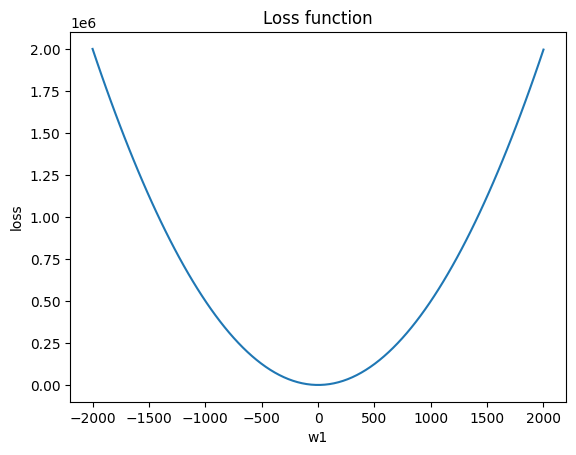

In [292]:
%matplotlib inline
import matplotlib.pyplot as plt

test_x = np.array([[1, 1]])
test_y = np.array([1])

x_axis= np.linspace(-2000, 2000, 100)
y_axis= [ loss_function(test_x, np.array([0, weight]), test_y) for weight in x_axis]

plt.plot(x_axis, y_axis)
plt.title("Loss function")
plt.xlabel("w1")
plt.ylabel("loss")
plt.show()

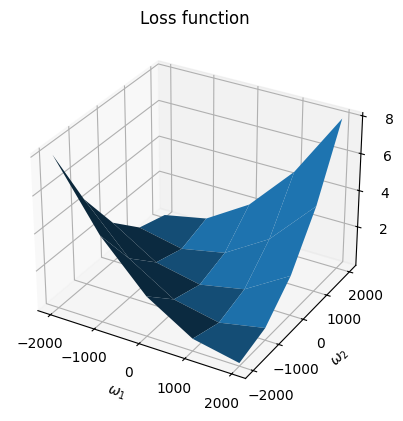

In [293]:
ax = plt.figure().add_subplot(projection="3d")

test_x = np.array([[1, 1, 1]])
test_y = np.array([1])

x_axis = np.linspace(-2000, 2000, 5)
y_axis = np.linspace(-2000, 2000, 5)

z_axis = []

weight_1, weight_2 = np.meshgrid(x_axis, y_axis)

for i in range(len(weight_1)):
    z_axis.append(
        [
            loss_function(test_x, np.array([0, weight_1[i][j], weight_2[i][j]]), test_y)
            for j in range(len(weight_1[i]))
        ]
    )

z_axis = np.array(z_axis)
# print(weight_1)
# print(weight_2)
# print(z_axis)


ax.plot_surface(weight_1, weight_2, z_axis, linewidth=0)
ax.set_xlabel("$\\omega_{1}$")
ax.set_ylabel("$\\omega_{2}$")
ax.set_zlabel("loss")


plt.title("Loss function")
plt.show()

## Реалізуйте один крок градієнтного спуску


$$\nabla J (\vec \omega) = \cfrac 1 {m} X^{T} \Bigl (X \vec \omega -\vec y \Bigl)$$

In [294]:
def gradient_step(x: np.array, w: np.array, y: np.array):
    m = x.shape[0]
    delta = hypothesis_linear_regression(x, w) - y
    return np.dot(x.T, delta) / m

In [295]:
def gradient_descent(
    x: np.array,
    w: np.array,
    y: np.array,
    count_iter: int = 10,
    learning_rate: float = 0.001,
    epsilon: float = 0.01,
):
    loss = loss_function(x, w, y)
    history_loss = [loss]

    for _ in range(count_iter):
        w = w - learning_rate * gradient_step(x, w, y)

        loss = loss_function(x, w, y)

        if np.abs(loss - history_loss[-1]) < epsilon:
            history_loss.append(loss)
            break

        history_loss.append(loss)

    return w, history_loss

## Знайдіть найкращі параметри 𝑤⃗ для [датасету](https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view?usp=share_link) прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [296]:
import pandas as pd
import seaborn as sns

In [297]:
URL = "https://drive.usercontent.google.com/download?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo&export=download"

dataframe = pd.read_csv(URL, header=0)
if len(dataframe) == 0:
    print("Error: file not found")
    raise ValueError

dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


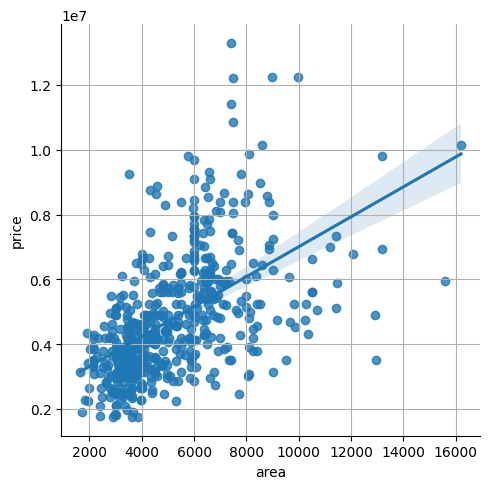

In [298]:
# dataframe.plot(x="area", y="price", kind="scatter", xlabel="area", ylabel="price", figsize=(15,5))

sns.lmplot(x="area", y="price", data=dataframe)
plt.grid()
plt.show()

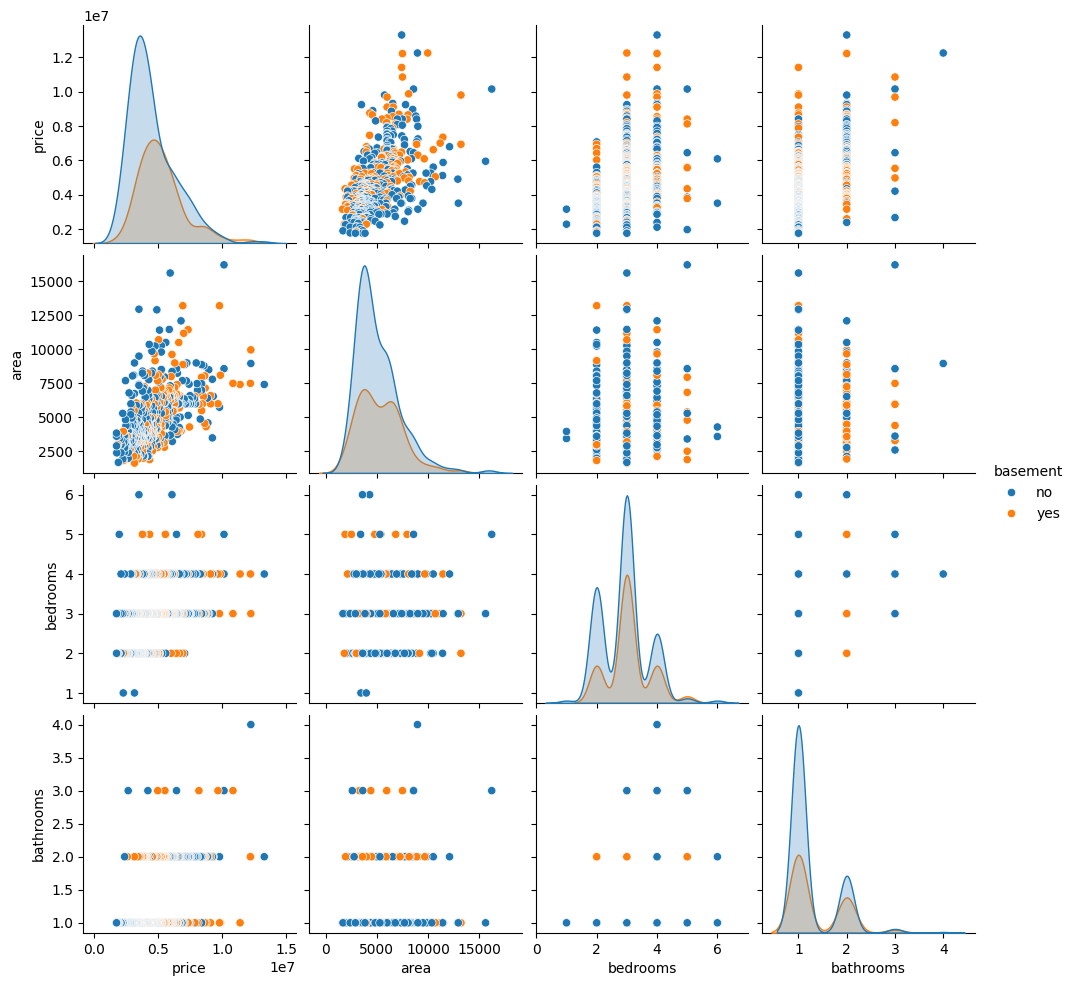

In [299]:
sns.pairplot(dataframe, vars=["price","area", "bedrooms", "bathrooms"], hue="basement")
plt.show()

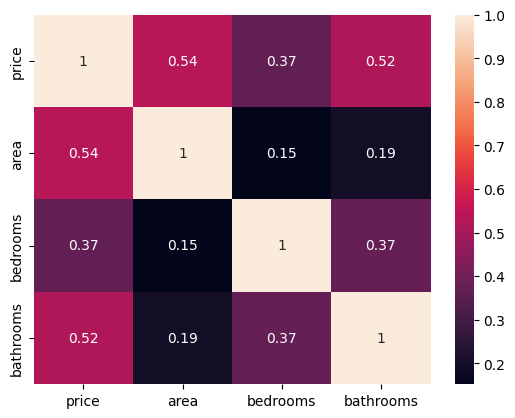

In [300]:
df_corr = dataframe[["price","area", "bedrooms", "bathrooms"]].corr()

sns.heatmap(df_corr, annot=True)
plt.show()

## Train

In [301]:
from IPython.display import Markdown, display
from sklearn.linear_model import LinearRegression

# train_len = int(dataframe.shape[0]*0.8)

columns_for_features = ["area", "bathrooms", "bedrooms"]
data_features = dataframe[columns_for_features]
columns_for_target = ["price"]
data_target = dataframe[columns_for_target]

model = LinearRegression()
regressor = model.fit(data_features, data_target)
print(model)

weight_regressor = np.concatenate((regressor.intercept_, regressor.coef_[0]))

columns_for_x_display = "\\\\".join(columns_for_features)
columns_for_y_display = "\\\\".join(
    [f"{_:.5f}" for _ in weight_regressor]
)

result_regressor = display(
    Markdown(
        f"$$ \\vec x = \\begin{{pmatrix}} 1 \\\\ {columns_for_x_display} \\end{{pmatrix}} ,   \\vec {{\\omega}} = \\begin{{pmatrix}} {columns_for_y_display} \\end{{pmatrix}} $$"
    )
)

LinearRegression()


$$ \vec x = \begin{pmatrix} 1 \\ area\\bathrooms\\bedrooms \end{pmatrix} ,   \vec {\omega} = \begin{pmatrix} -173171.60763\\378.76275\\1386049.49779\\406820.03377 \end{pmatrix} $$

## Знайдіть ці ж параметри за допомогою аналітичного рішення

In [302]:
def normalize(data: np.array):

    mean = np.mean(data)

    value_range = np.max(data) - np.min(data)

    result = []

    for value in data:
        result.append((value - mean) / value_range)

    return result

$$ \vec x = \begin{pmatrix} 1 \\ area\\bathrooms\\bedrooms \end{pmatrix} ,   \vec {\omega} = \begin{pmatrix} 0.23456\\855.65878\\0.38677\\0.77943 \end{pmatrix} $$

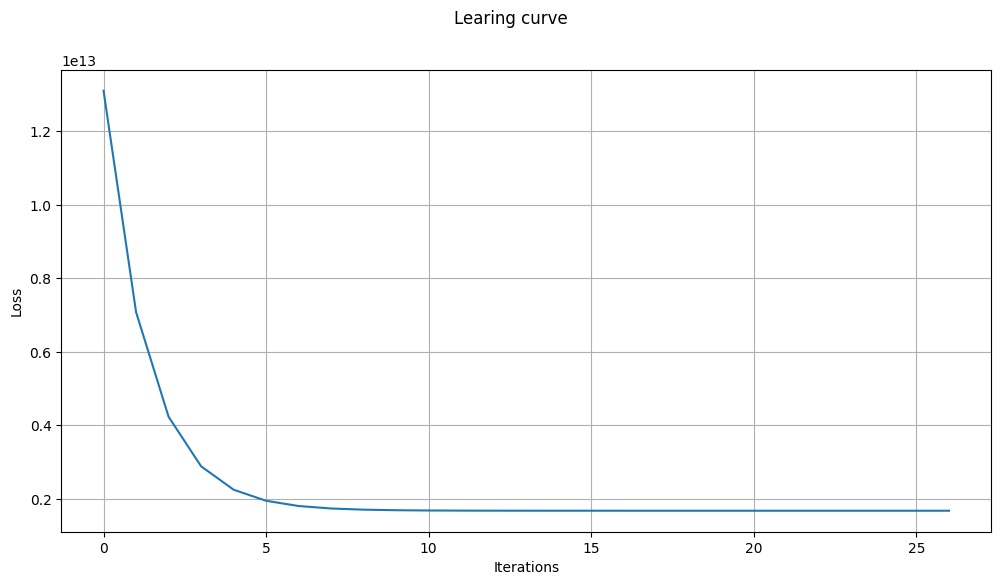

In [303]:
try:
    data_features.insert(
        0, "free", np.array([[1] for _ in range(data_features.shape[0])])
    )
except:
    pass

weight_analytic = np.array([[0.0] for _ in range(data_features.shape[1])])


# weight_analytic, loss_history = gradient_descent(
#     data_features.values, weight_analytic, normalize(data_target.values), 1000, 0.0001, 0.01
# )
weight_analytic, loss_history = gradient_descent(
    data_features.values, weight_analytic, data_target.values, 1000, 0.00000001, 1e5
)

columns_for_x_display = "\\\\".join(columns_for_features)
columns_for_y_display = "\\\\".join([f"{_:.5f}" for _ in weight_analytic.T[0]])

result_analytic_regressor = display(
    Markdown(
        f"$$ \\vec x = \\begin{{pmatrix}} 1 \\\\ {columns_for_x_display} \\end{{pmatrix}} ,   \\vec {{\\omega}} = \\begin{{pmatrix}} {columns_for_y_display} \\end{{pmatrix}} $$"
    )
)

plt.figure(figsize=(12, 6))
plt.suptitle("Learing curve")
plt.plot(loss_history)
plt.grid()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

## Вариант 2

In [304]:
data_features = dataframe[columns_for_features].values
data_target = dataframe[columns_for_target].values
data_matrix = np.concatenate((np.ones((data_features.shape[0], 1)), data_features), axis=1).astype("int64")

weigth_analytic_2 = np.linalg.inv(data_matrix.T @ data_matrix) @ data_matrix.T @ data_target

columns_for_y_display = "\\\\".join([f"{_:.5f}" for _ in weigth_analytic_2.T[0]])

result_analytic_regressor = display(
    Markdown(
        f"$$ \\vec x = \\begin{{pmatrix}} 1 \\\\ {columns_for_x_display} \\end{{pmatrix}} ,   \\vec {{\\omega}} = \\begin{{pmatrix}} {columns_for_y_display} \\end{{pmatrix}} $$"
    )
)

$$ \vec x = \begin{pmatrix} 1 \\ area\\bathrooms\\bedrooms \end{pmatrix} ,   \vec {\omega} = \begin{pmatrix} -173171.60763\\378.76275\\1386049.49779\\406820.03377 \end{pmatrix} $$

## Порівняйте отримані результати

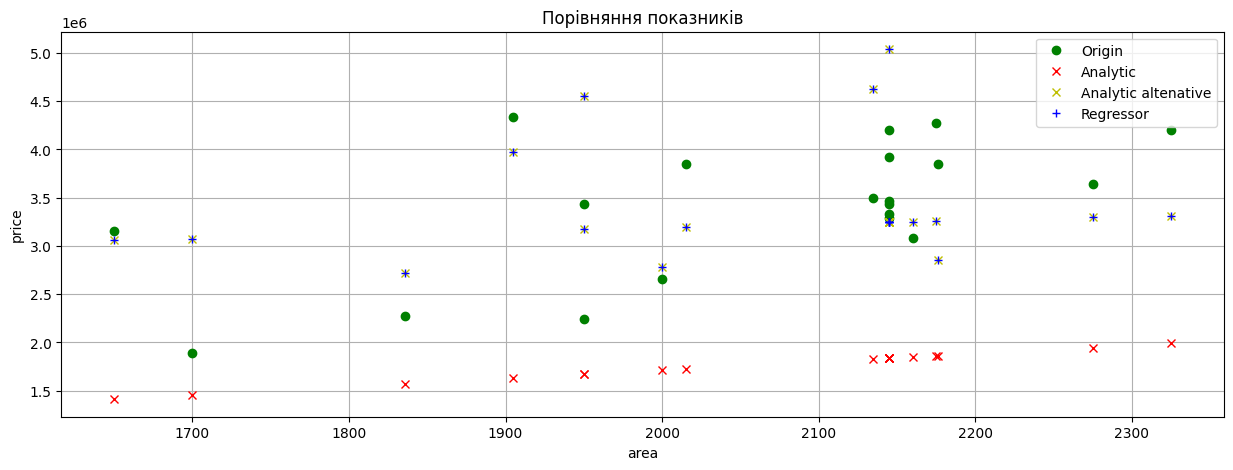

In [305]:
dataframe_analized = dataframe[["area", "bathrooms", "bedrooms", "price"]].sort_values('area')[:20]
data_analized_features = dataframe_analized[["area", "bathrooms", "bedrooms"]]
data_analized_target = dataframe_analized[["price"]]

data_analized_features_with_free = data_analized_features.copy()
data_analized_features_with_free.insert(
        0, "free", np.array([[1] for _ in range(data_analized_features_with_free.shape[0])])
)

plt.figure(figsize=(15,5))
plt.plot(data_analized_features["area"], data_analized_target["price"], 'go', label = 'Origin')
plt.plot(data_analized_features["area"], hypothesis_linear_regression(data_analized_features_with_free.values, weight_analytic), 'rx', label = 'Analytic')
plt.plot(data_analized_features["area"], hypothesis_linear_regression(data_analized_features_with_free.values, weigth_analytic_2), 'yx', label = 'Analytic altenative')
plt.plot(data_analized_features["area"], hypothesis_linear_regression(data_analized_features_with_free.values, weight_regressor), 'b+', label = 'Regressor')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Порівняння показників')
plt.legend()
plt.grid()
plt.show()